# Credit Risk Evaluator

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Retrieve the Data

The data is located in the Challenge Files Folder:

* `lending_data.csv`

Import the data using Pandas. Display the resulting dataframe to confirm the import was successful.

In [2]:
# Import the data
file_path = Path("Resources/lending_data.csv")
lending_df = pd.read_csv(file_path)
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

Prediction: Based on the fact that we are working with continuous/quantitative data, that is, financial information, I believe that logistic regression will be a more useful test than the random forest classifier, which is better with discrete or qualitative data. 

## Split the Data into Training and Testing Sets

In [3]:
lending_df.shape

(77536, 8)

In [4]:
# Define the X (features) and y (target) sets
y = lending_df["loan_status"].values
X = lending_df.drop("loan_status", axis=1)

In [5]:
# Split the data into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Create, Fit and Compare Models

Create a Logistic Regression model, fit it to the data, and print the model's score. Do the same for a Random Forest Classifier. You may choose any starting hyperparameters you like. 

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the designated markdown cell.

In [6]:
# Train a Logistic Regression model and print the model score
classifier = LogisticRegression()
classifier

LogisticRegression()

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377


visualizing some of the data to look for correlations:

In [17]:
x = lending_df['num_of_accounts']
y = lending_df['loan_status']

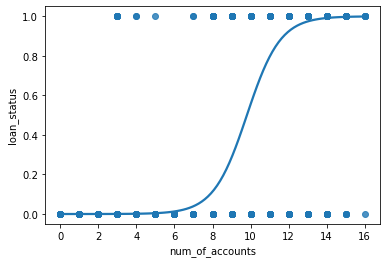

In [18]:
import seaborn as sns

sns.regplot(x=x, y=y, data=lending_df, logistic=True, ci=None)

In [11]:
lending_df.dtypes

loan_size           float64
interest_rate       float64
borrower_income       int64
debt_to_income      float64
num_of_accounts       int64
derogatory_marks      int64
total_debt            int64
loan_status           int64
dtype: object

In [14]:
# # Train a Random Forest Classifier model and print the model score

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748


[1.29066792e-01 2.74137485e-01 1.74521675e-01 1.58682971e-01
 1.18902531e-01 8.06639163e-05 1.44607881e-01]


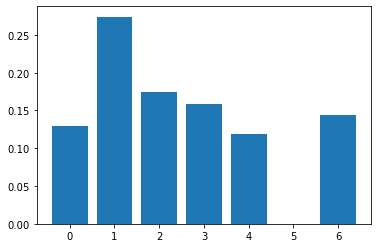

In [16]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

*Which model performed better? How does that compare to your prediction? Replace the text in this markdown cell with your answers to these questions.*

Based on the outcomes of both Logistic Regression:

Training Data Score: 0.9921240885954051
Testing Data Score: 0.9918489475856377

And that of the Random Forest Classifier:

Training Score: 0.9975409272252029
Testing Score: 0.9917457697069748

I believe that the scores are surprisingly good and also surprisingly close, with the outcomes of logistic regression performing slightly better overall.  This was my prediction, although I did not expect both tests to be nearly equally matched when it came to achieving a good result.